# **Import Library yang dibutuhkan**

In [157]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [158]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_PLNMobile_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-06-14 13:49:34,"sangat bermanfaat, cepat ditanggapi, lengkap"
1,Pengguna Google,5,2024-06-14 13:43:44,"Pelayanan maksimal,Respon cepat dan aplikasi s..."
2,Pengguna Google,5,2024-06-14 13:43:11,Sangat cepat dang tanggap
3,Pengguna Google,5,2024-06-14 13:41:26,"Cepat responnya,makasih PLN"
4,Pengguna Google,5,2024-06-14 13:41:20,PLN mantap sekali


In [159]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"sangat bermanfaat, cepat ditanggapi, lengkap",Pengguna Google,2024-06-14 13:49:34
1,"Pelayanan maksimal,Respon cepat dan aplikasi s...",Pengguna Google,2024-06-14 13:43:44
2,Sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,"Cepat responnya,makasih PLN",Pengguna Google,2024-06-14 13:41:26
4,PLN mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4995,PLN terbaik dan sukses,Marthinus Riry,2024-06-10 00:15:54
4996,Aplikasi yg sangat membantu,Sabri Hadi,2024-06-10 00:12:26
4997,Pln mobeli terbaik dan terpercaya,Piti Coy,2024-06-10 00:10:53
4998,"Apilaksi Yang Sangat membantu,Terbaik👍",Akbar Saputra,2024-06-10 00:09:24


In [160]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   5000 non-null   object
 1   userName  5000 non-null   object
 2   at        5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [161]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,5000,5000,5000
unique,4079,500,4949
top,Mantap,Pengguna Google,2024-06-13 11:27:46
freq,85,4501,2


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [162]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(5000, 3)

In [163]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [164]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [165]:
# Menghapus data yang kosong

df = df.dropna()

In [166]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [167]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(4079, 3)

In [168]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [169]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [170]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,sangat bermanfaat cepat ditanggapi lengkap,Pengguna Google,2024-06-14 13:49:34
1,pelayanan maksimalrespon cepat dan aplikasi sa...,Pengguna Google,2024-06-14 13:43:44
2,sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,cepat responnyamakasih pln,Pengguna Google,2024-06-14 13:41:26
4,pln mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4993,cepat respon dan top apliksinya,Sabrina Rina,2024-06-10 00:17:15
4995,pln terbaik dan sukses,Marthinus Riry,2024-06-10 00:15:54
4997,pln mobeli terbaik dan terpercaya,Piti Coy,2024-06-10 00:10:53
4998,apilaksi yang sangat membantuterbaik,Akbar Saputra,2024-06-10 00:09:24


# **Normalization**

In [171]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,sangat bermanfaat cepat ditanggapi lenggaap,Pengguna Google,2024-06-14 13:49:34
1,pelayanan maksimalrespon cepat dan aplikasi sa...,Pengguna Google,2024-06-14 13:43:44
2,sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,cepat responnyamakasih pln,Pengguna Google,2024-06-14 13:41:26
4,pln mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4993,cepat respon dan top apliksinya,Sabrina Rina,2024-06-10 00:17:15
4995,pln terbaik dan sukses,Marthinus Riry,2024-06-10 00:15:54
4997,pln mobile terbaik dan terpercaya,Piti Coy,2024-06-10 00:10:53
4998,apilaksi yang sangat membantuterbaik,Akbar Saputra,2024-06-10 00:09:24


# **Stopwords**

In [172]:
# Menginstall Library Sastrawi

!pip install Sastrawi

In [173]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,sangat bermanfaat cepat ditanggapi lenggaap,Pengguna Google,2024-06-14 13:49:34
1,pelayanan maksimalrespon cepat aplikasi sangat...,Pengguna Google,2024-06-14 13:43:44
2,sangat cepat dang tanggap,Pengguna Google,2024-06-14 13:43:11
3,cepat responnyamakasih pln,Pengguna Google,2024-06-14 13:41:26
4,pln mantap sekali,Pengguna Google,2024-06-14 13:41:20
...,...,...,...
4993,cepat respon top apliksinya,Sabrina Rina,2024-06-10 00:17:15
4995,pln terbaik sukses,Marthinus Riry,2024-06-10 00:15:54
4997,pln mobile terbaik terpercaya,Piti Coy,2024-06-10 00:10:53
4998,apilaksi sangat membantuterbaik,Akbar Saputra,2024-06-10 00:09:24


# **Tokenize**

In [174]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [sangat, bermanfaat, cepat, ditanggapi, lenggaap]
1       [pelayanan, maksimalrespon, cepat, aplikasi, s...
2                          [sangat, cepat, dang, tanggap]
3                          [cepat, responnyamakasih, pln]
4                                   [pln, mantap, sekali]
                              ...                        
4993                     [cepat, respon, top, apliksinya]
4995                               [pln, terbaik, sukses]
4997                   [pln, mobile, terbaik, terpercaya]
4998                  [apilaksi, sangat, membantuterbaik]
4999    [pln, terbaik, app, sangat, berguna, laporan, ...
Name: content, Length: 4079, dtype: object

# **Stemming**

In [175]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PLNMobile_1.csv', index = False)


In [176]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PLNMobile_1.csv', encoding = 'latin1')
df_clean

,content
0,sangat manfaat cepat tanggap lenggaap
1,layan maksimalrespon cepat aplikasi sangat aku...
2,sangat cepat dang tanggap
3,cepat responnyamakasih pln
4,pln mantap sekali
...,...
4074,cepat respon top apliksinya
4075,pln baik sukses
4076,pln mobile baik percaya
4077,apilaksi sangat membantuterbaik


# **Translate**

In [177]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [178]:
# import pandas as pd
# from easynmt import EasyNMT

In [179]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PLNMobile_1.csv', encoding='latin1')

In [180]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [181]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [182]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [183]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PLNMobile_1.csv')

In [184]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PLNMobile_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...
1,1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...
2,2,sangat cepat dang tanggap,"Very quick, very alert."
3,3,cepat responnyamakasih pln,fast response thank you very much
4,4,pln mantap sekali,It's great.
...,...,...,...
4074,4074,cepat respon top apliksinya,quickly respond to the top application
4075,4075,pln baik sukses,good success
4076,4076,pln mobile baik percaya,Have a good mobile believe
4077,4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.


# **Labeling**

In [185]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PLNMobile_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...
1,1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...
2,2,sangat cepat dang tanggap,"Very quick, very alert."
3,3,cepat responnyamakasih pln,fast response thank you very much
4,4,pln mantap sekali,It's great.
...,...,...,...
4074,4074,cepat respon top apliksinya,quickly respond to the top application
4075,4075,pln baik sukses,good success
4076,4076,pln mobile baik percaya,Have a good mobile believe
4077,4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.


In [186]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [187]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [188]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 2911
Netral = 1037
Negatif = 131

Total Data Seluruhnya : 4079


In [189]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,Positif
1,1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,Positif
2,2,sangat cepat dang tanggap,"Very quick, very alert.",Positif
3,3,cepat responnyamakasih pln,fast response thank you very much,Positif
4,4,pln mantap sekali,It's great.,Positif
...,...,...,...,...
4074,4074,cepat respon top apliksinya,quickly respond to the top application,Positif
4075,4075,pln baik sukses,good success,Positif
4076,4076,pln mobile baik percaya,Have a good mobile believe,Positif
4077,4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,Positif


In [190]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,Positif
1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,Positif
2,sangat cepat dang tanggap,"Very quick, very alert.",Positif
3,cepat responnyamakasih pln,fast response thank you very much,Positif
4,pln mantap sekali,It's great.,Positif
...,...,...,...
4074,cepat respon top apliksinya,quickly respond to the top application,Positif
4075,pln baik sukses,good success,Positif
4076,pln mobile baik percaya,Have a good mobile believe,Positif
4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



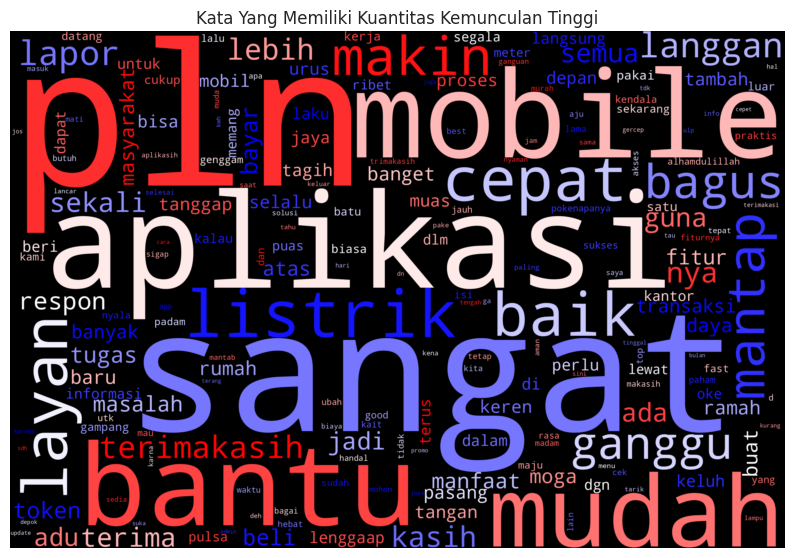

In [191]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


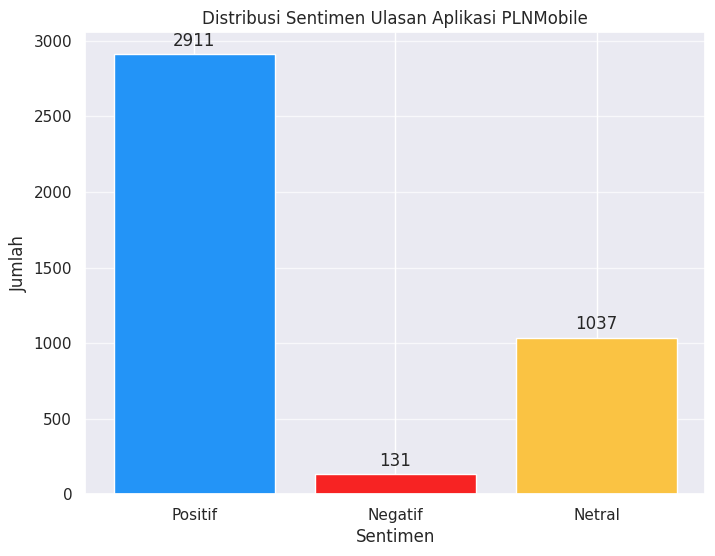

In [192]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")


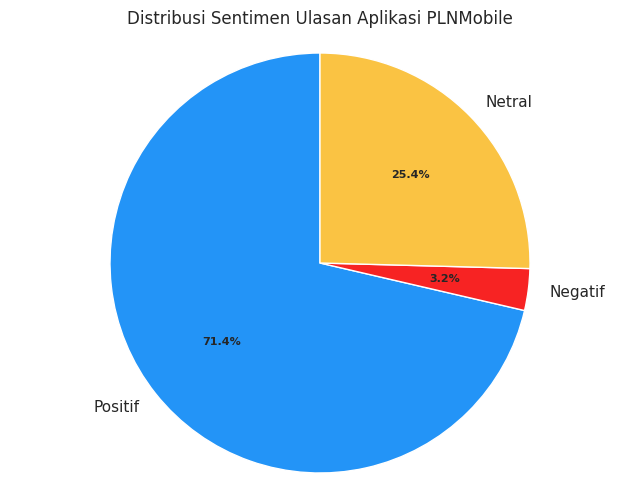

In [193]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")

In [194]:
data = data.replace({'Positif':0, 'Netral':1, 'Negatif':2})
data

,content,content_en,sentimen
0,sangat manfaat cepat tanggap lenggaap,it's a huge benefit of fast-responsive opportu...,0
1,layan maksimalrespon cepat aplikasi sangat aku...,The application's maximum response layer is ac...,0
2,sangat cepat dang tanggap,"Very quick, very alert.",0
3,cepat responnyamakasih pln,fast response thank you very much,0
4,pln mantap sekali,It's great.,0
...,...,...,...
4074,cepat respon top apliksinya,quickly respond to the top application,0
4075,pln baik sukses,good success,0
4076,pln mobile baik percaya,Have a good mobile believe,0
4077,apilaksi sangat membantuterbaik,Fireblaction is very helpful at its best.,0


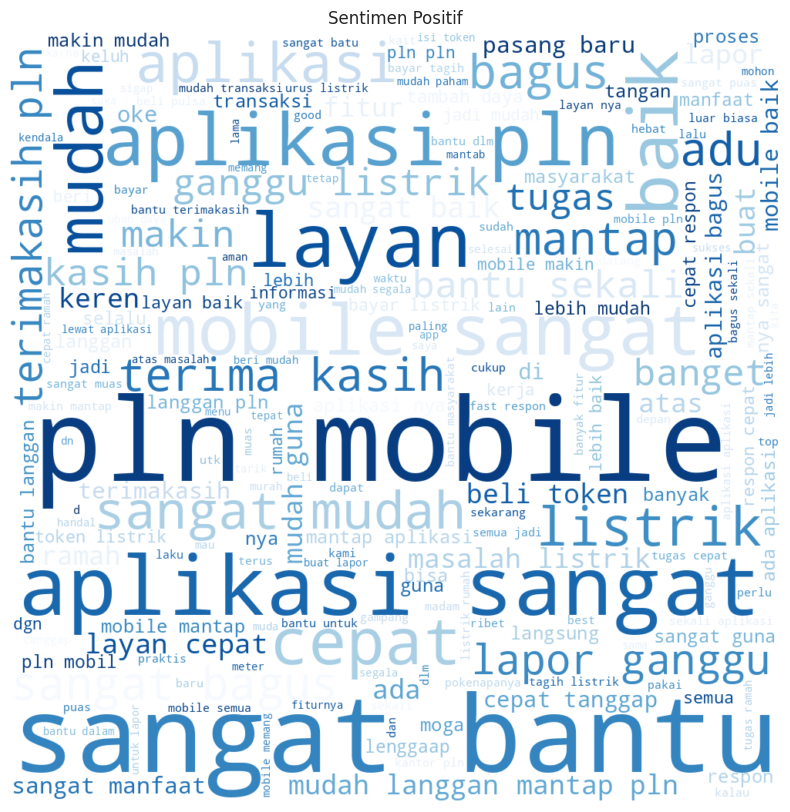

In [195]:
# Visualisasi Wordcould Positif, Netral, dan Negatif

data_positif = data[data['sentimen'] == 0]
data_netral = data[data['sentimen'] == 1]
data_negatif = data[data['sentimen'] == 2]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

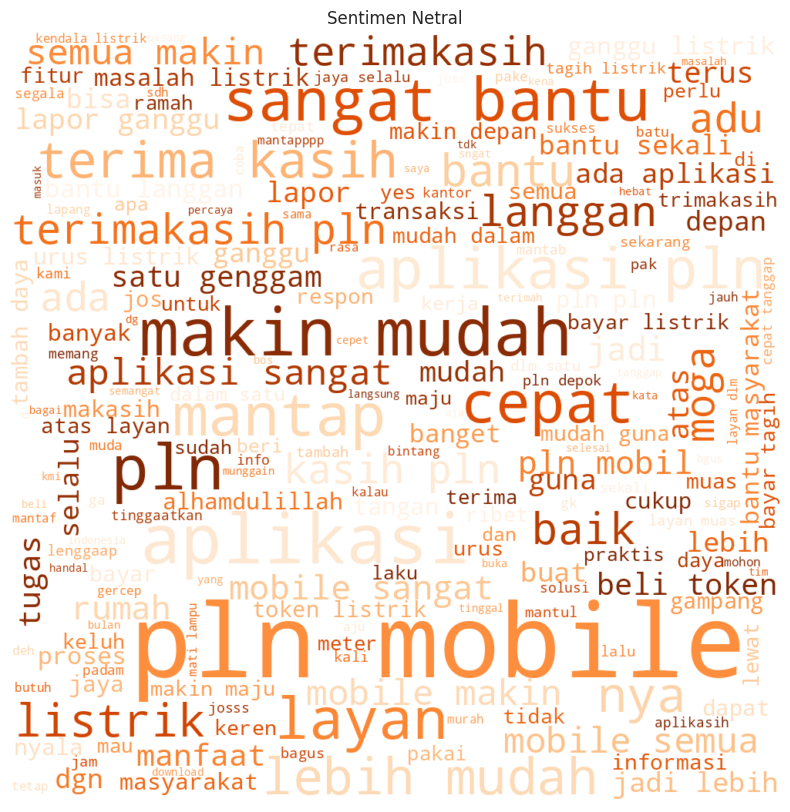

In [196]:
# Sentimen Netral

all_words = ' '.join([reviews for reviews in data_netral['content']])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

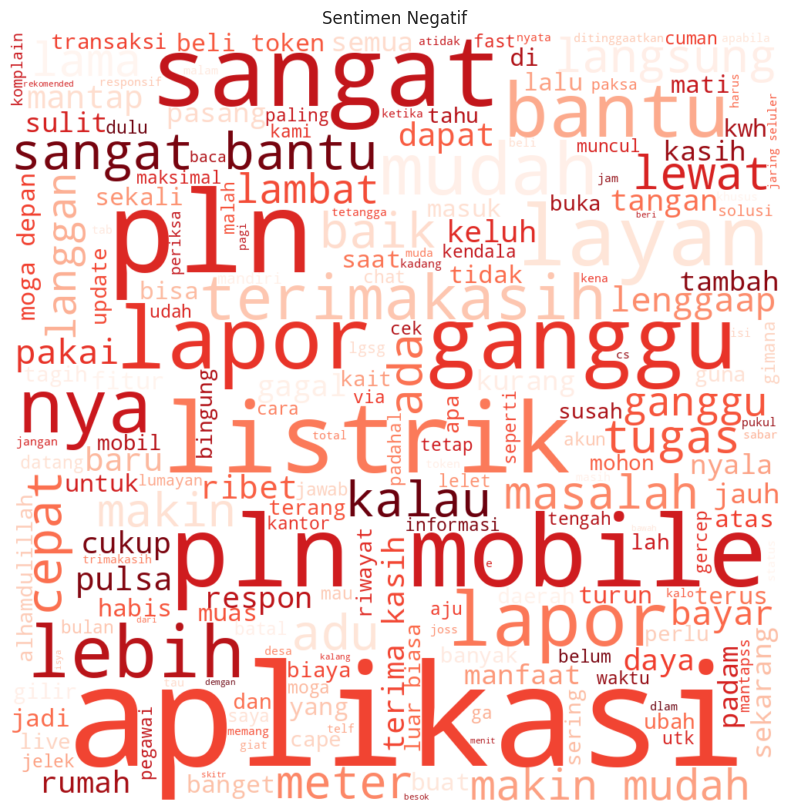

In [197]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [198]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
0    2911
1    1037
2     131
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [319]:
# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [340]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [417]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [418]:
# # Melakukan oversampling menggunakan SMOTE pada data latih

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)


In [419]:
# # Melakukan oversampling menggunakan ADASYN pada data latih

# adasyn = ADASYN(random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_vec, y_train)


In [420]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)


In [421]:
# # Melakukan oversampling menggunakan Random Under-Sampling pada data latih

# rus = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train_vec, y_train)


In [422]:
# # Melakukan oversampling menggunakan Tomek Links pada data latih

# tomek = TomekLinks()
# X_train_resampled, y_train_resampled = tomek.fit_resample(X_train_vec, y_train)


In [423]:
# # Melakukan oversampling menggunakan Cluster Centroids pada data latih

# cc = ClusterCentroids(random_state=42)
# X_train_resampled, y_train_resampled = cc.fit_resample(X_train_vec, y_train)


In [424]:
# # Melakukan oversampling menggunakan SMOTE + Tomek Links pada data latih

# smote_tomek = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_vec, y_train)


In [425]:
# # Melakukan oversampling menggunakan SMOTE + ENN Links pada data latih

# smote_enn = SMOTEENN(random_state=42)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_vec, y_train)


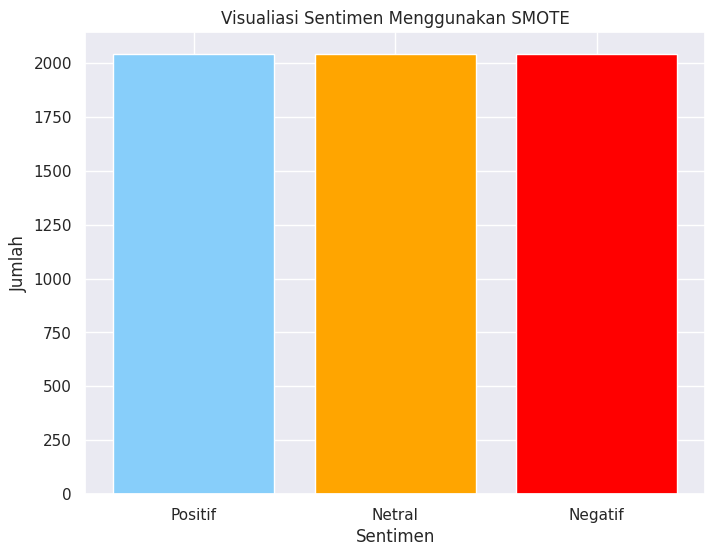

In [426]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'orange', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Netral', 'Negatif'])
plt.show()

# **Data Mining**

In [427]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [428]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [429]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [430]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Netral', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7230392156862745

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.82      0.82      0.82       871
      Netral       0.55      0.51      0.53       308
     Negatif       0.16      0.24      0.20        45

    accuracy                           0.72      1224
   macro avg       0.51      0.53      0.52      1224
weighted avg       0.73      0.72      0.73      1224



In [431]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

print('\nTrue Positives (TP):', cm[0, 0])
print('False Negatives (FN) for Positive class:', cm[0, 1] + cm[0, 2])
print('False Positives (FP) for Positive class:', cm[1, 0] + cm[2, 0])
print('True Negatives (TN) for Negative class:', cm[1, 1])
print('False Negatives (FN) for Negative class:', cm[1, 2])
print('False Positives (FP) for Negative class:', cm[2, 1])
print('True Negatives (TN) for Neutral class:', cm[2, 2])

Confusion matrix

 [[716 119  36]
 [130 158  20]
 [ 24  10  11]]

Accuracy =  0.7230392156862745

True Positives (TP): 716
False Negatives (FN) for Positive class: 155
False Positives (FP) for Positive class: 154
True Negatives (TN) for Negative class: 158
False Negatives (FN) for Negative class: 20
False Positives (FP) for Negative class: 10
True Negatives (TN) for Neutral class: 11


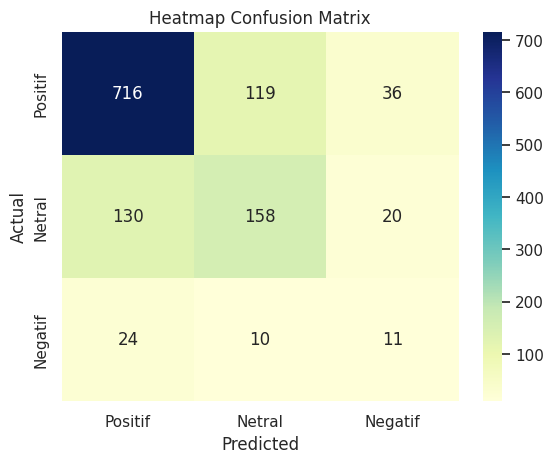

In [432]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Netral', 'Negatif'],
                         index=['Positif', 'Netral', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [433]:
# Slicing Confusion Matrix

tp = cm[0, 0]
fn_pos = cm[0, 1] + cm[0, 2]
fp_pos = cm[1, 0] + cm[2, 0]
tn_neg = cm[1, 1]
fn_neg = cm[1, 2]
fp_neg = cm[2, 1]
tn_neu = cm[2, 2]

total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

In [434]:
# Calculate classification Accuracy
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

classification_accuracy = correct / total
print(f'\nClassification Accuracy: {classification_accuracy:.4f}')


Classification Accuracy: 0.7230


In [435]:
# Calculate Classification Error
total_instances = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
misclassified_instances = fn_pos + fp_pos + fn_neg + fp_neg

classification_error = misclassified_instances / total_instances
print(f'\nClassification Error: {classification_error:.4f}')


Classification Error: 0.2770


# **Testing**

In [436]:
# Contoh Prediksi Teks Baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasi y Sangat berguna dan sangat membantu, memberi ke mudah dan super praktis, lebih simple dan hemat waktu karna bisa d akses Kapan on dan d mana pun, tinggal klik (PLN MOBILE). Terimakasih PLN sudah memberi penerangan dan Semoga kelistrikan makin handal sukses selalu.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 99.32%
Probabilitas: 99.32012730765945 %


In [440]:
# Contoh Prediksi Teks Baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasinya sangat lelet. Loding sangat lambat, padahal jaringan internet 4G+ . Ditambah lagi swacam tidak berfungsi baik, tetap merepotkan petugas cater. Tidak direkomendasikan buat download ini, aplikasi jelek..
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 99.92%
Probabilitas: 99.92357273171159 %
